## THE COVID-19 DATA ANALYSIS FOR LOMBARDIA REGION, ITALY

### In this analysis am going to explore the relationships between various factors related to COVID-19 in the Lombardia region. The analysis will focus on the following questions:

1. What is the relationship between the number of hospitalized patients and the number of recoveries in the Lombardia region?
2. How does the number of hospitalizations correlate with the number of deaths in the Lombardia region?
3. What is the relationship between the number of patients in the Intensive Care Unit (ICU) and the number of deaths in the Lombardia region?
4. How does home confinement relate to the number of deaths in the Lombardia region?


### importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
covidData = pd.read_csv("C:/users/hp/Downloads/covid19_italy.csv")

In [4]:
covidData.head()

,SNo,Date,Country,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
0,0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,NaN
1,1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,NaN
2,2,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,NaN
3,3,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,NaN
4,4,2020-02-24T18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,10,2,12,6,18,18,0,0,18,NaN


In [5]:
covidData.columns

Index(['SNo', 'Date', 'Country', 'RegionCode', 'RegionName', 'Latitude',
       'Longitude', 'HospitalizedPatients', 'IntensiveCarePatients',
       'TotalHospitalizedPatients', 'HomeConfinement', 'CurrentPositiveCases',
       'NewPositiveCases', 'Recovered', 'Deaths', 'TotalPositiveCases',
       'TestsPerformed'],
      dtype='object')

In [6]:
covidData.describe()

,SNo,RegionCode,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
count,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.00000,4.872000e+03
mean,3013.000000,11.857143,43.046293,12.225955,509.093579,55.892318,564.985897,5722.911399,6287.897296,286.885847,9337.852829,1474.370665,17100.12361,2.600810e+05
std,1739.989368,6.274319,2.488987,2.659168,1272.731157,134.957979,1403.362341,15892.768789,16804.884786,818.450458,20551.265039,3365.190225,36934.67627,3.339818e+05
min,0.000000,1.000000,38.115697,7.320149,0.000000,0.000000,0.000000,0.000000,0.000000,-229.000000,0.000000,0.000000,0.00000,3.482000e+03
25%,1506.500000,7.000000,41.125596,11.121231,16.000000,1.000000,17.000000,139.000000,168.000000,4.000000,734.000000,98.000000,1383.50000,6.507375e+04
50%,3013.000000,12.000000,43.616760,12.388247,93.000000,9.000000,106.000000,743.000000,905.000000,31.000000,2840.000000,389.000000,4613.00000,1.365560e+05
75%,4519.500000,17.000000,45.434905,13.768136,384.500000,46.000000,434.000000,3057.000000,3735.000000,159.500000,8450.500000,1102.500000,15304.00000,3.043542e+05
max,6026.000000,22.000000,46.499335,16.867367,12077.000000,1381.000000,13328.000000,155066.000000,164406.000000,11489.000000,289706.000000,23024.000000,429109.00000,2.415099e+06


## RELATING VARIABLES WITH SCATTER PLOT

### Relationship between those who are hospitalized and those who are recovering from the disease in lombardia region

In [7]:
subset = covidData.head(500)
lombardia_region = subset.loc[subset["RegionCode"] == 3]

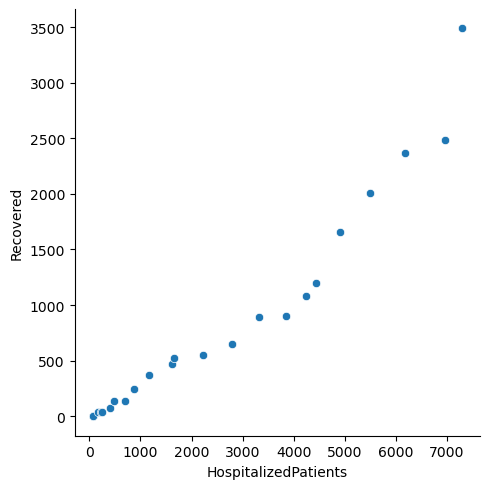

In [8]:
sns.relplot(x="HospitalizedPatients", y="Recovered", data=lombardia_region)

#### The trend suggests that more people recover as more people are hospitalized, indicating that hospitalization plays a significant role in the recovery process. This suggests that increased hospitalization leads to more recoveries, reflecting effective healthcare interventions during hospitalization.

### Relationship between those who were hospitalized and those who died from the disease in lombardia region.

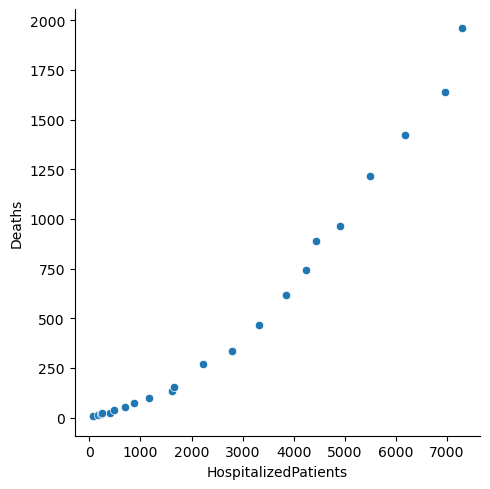

In [9]:
sns.relplot(x="HospitalizedPatients", y="Deaths", data=lombardia_region)

#### The trend indicates that a higher number of hospitalizations is associated with a higher number of deaths. This relationship indicates that as more severe cases are hospitalized, the likelihood of death increases, which reflects  the critical condition of patients requiring hospitalization.

### Relationship between those who were in intensive care unit and those who died from the disease in lombardia region.

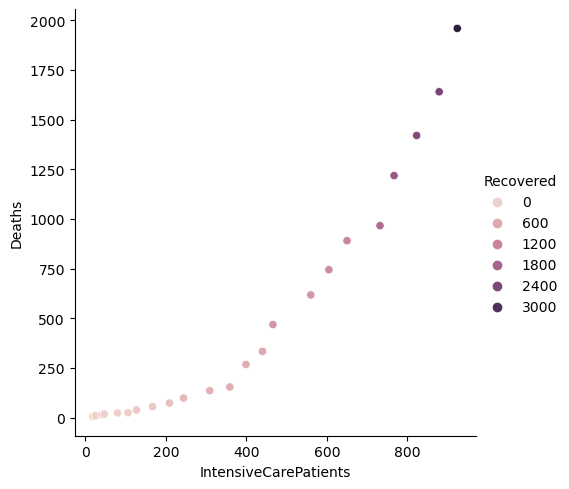

In [10]:
sns.relplot(x="IntensiveCarePatients", y="Deaths", hue="Recovered", data=lombardia_region)

#### There is a positive correlation between the number of ICU patients and the number of deaths. As the number of ICU patients increases, the number of deaths also tends to increase. 
#### The graph highlights that a higher number of patients in intensive care is associated with a higher number of deaths.

### Relationship btn those who were in home confinement and those who died from the disease in lombardia region.

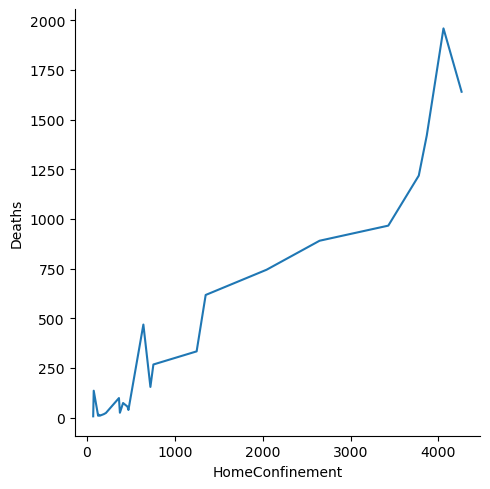

In [11]:
sns.relplot(x="HomeConfinement", y="Deaths",kind = 'line', data=lombardia_region)

#### This graph suggests that as the number of patients in home confinement increases, so too does the mortality rate, indicating that home confinement might not have been effective enough in preventing deaths.